# STOCKPEDIA MODEL MAKING

Made by :
1. Bryan Sereno Sutanto    - 2702245141
2. Peter Abraham Besinga   - 2702253761
3. Natanael Timotius Thung - 2702242000
4. Hanzel Octavian Lesmana - 2702241162

Main Algotithms used in this project :
- Linear Regression
- Polynomial Regression
- Random Forest Regressor
- Ensemble Voting Regressor

Each hyperparameters were determined using GridSearchCV technique

### Library


In [ ]:
# Standard Library
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Models Used
from sklearn.ensemble import RandomForestRegressor
from sklearn.linear_model import SGDClassifier
from sklearn.preprocessing import PolynomialFeatures, StandardScaler, LabelEncoder, MinMaxScaler, RobustScaler
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import VotingRegressor
from sklearn.multioutput import MultiOutputRegressor
from collections import defaultdict

# Model Making + Metrics
from sklearn.model_selection import train_test_split, TimeSeriesSplit, cross_val_score
from sklearn.datasets import make_regression
from sklearn.metrics import mean_absolute_error, mean_squared_error, accuracy_score, classification_report, confusion_matrix, r2_score, root_mean_squared_error
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# Model export + Dataset Downloading
import joblib
import yfinance as yf
from tabulate import tabulate
import pickle

### 1. Data Gathering

In [2]:
listed_stock = [
    'BBCA.JK', 'BBRI.JK', 'BMRI.JK', 'GOTO.JK', 'TLKM.JK',
    'ASII.JK', 'MDKA.JK', 'BBNI.JK', 'BOGA.JK', 'ADRO.JK',
    'NATO.JK', 'PRAY.JK', 'ANTM.JK', 'BHAT.JK', 'UNTR.JK',
    'ARTO.JK', 'BRIS.JK', 'SMMA.JK', 'MEDC.JK', 'TCPI.JK'
]

data = yf.download(tickers = listed_stock, start = "2020-01-01", end="2024-12-30", interval='1d', group_by='ticker', auto_adjust=True)

[*********************100%***********************]  20 of 20 completed


In [3]:
data.describe()

Ticker      NATO.JK                                                       \
Price          Open         High          Low        Close        Volume   
count   1210.000000  1210.000000  1210.000000  1210.000000  1.210000e+03   
mean     489.763636   499.907438   479.868595   489.459504  1.741568e+08   
std      241.854406   245.716531   236.437553   241.469016  1.309640e+08   
min      100.000000   119.000000    91.000000   102.000000  0.000000e+00   
25%      282.000000   305.000000   282.000000   292.000000  6.647300e+06   
50%      505.000000   517.500000   498.000000   507.500000  2.239720e+08   
75%      585.000000   605.000000   575.000000   585.000000  2.762754e+08   
max     1200.000000  1395.000000  1170.000000  1200.000000  4.792149e+08   

Ticker      BBRI.JK                                                       ...  \
Price          Open         High          Low        Close        Volume  ...   
count   1210.000000  1210.000000  1210.000000  1210.000000  1.210000e+03  ...   
mean    3632.709535  3672.607454  3590.068858  3628.393856  1.842402e+08  ...   
std      891.119383   895.353160   891.462026   894.236319  1.157587e+08  ...   
min     1569.563674  1583.515525  1506.781189  1513.757080  2.767650e+07  ...   
25%     3001.342980  3034.925196  2963.206990  2995.712341  1.070493e+08  ...   
50%     3611.202099  3652.052902  3570.351434  3619.372070  1.511771e+08  ...   
75%     4363.490101  4427.524554  4324.611988  4363.001953  2.187354e+08  ...   
max     5763.100219  5785.969664  5694.491883  5763.100098  9.598846e+08  ...   

Ticker      BBNI.JK                                                       \
Price          Open         High          Low        Close        Volume   
count   1210.000000  1210.000000  1210.000000  1210.000000  1.210000e+03   
mean    3385.454016  3425.040847  3340.011124  3380.952280  7.099573e+07   
std     1048.677712  1054.475522  1041.567424  1047.774111  5.179480e+07   
min     1292.781310  1395.058354  1215.050788  1292.781494  0.000000e+00   
25%     2444.420696  2484.190293  2403.509489  2434.193115  3.840912e+07   
50%     3526.801073  3568.786600  3474.318885  3532.049316  5.584005e+07   
75%     4138.769729  4176.089032  4094.973028  4138.769531  8.554512e+07   
max     5460.848145  5483.792800  5414.958581  5460.848145  4.440854e+08   

Ticker       UNTR.JK                                                          
Price           Open          High           Low         Close        Volume  
count    1210.000000   1210.000000   1210.000000   1210.000000  1.210000e+03  
mean    18495.624573  18725.117772  18243.871600  18468.367375  4.935204e+06  
std      4741.876225   4752.961409   4723.020816   4739.033453  3.223833e+06  
min      7883.589226   8160.745695   7390.864899   7760.407227  0.000000e+00  
25%     14623.454522  14814.819827  14426.148981  14614.040771  2.918800e+06  
50%     18887.586276  19098.299696  18574.679018  18783.592773  4.233150e+06  
75%     22148.252109  22388.739379  21897.437909  22129.288574  6.013200e+06  
max     28498.152427  28498.152427  27973.186461  28498.152344  5.051660e+07  

[8 rows x 100 columns]

In [4]:
data.shape

(1210, 100)

In [ ]:
for ticker in listed_stock:
    print(f"\n--- {ticker} ---")
    if ticker in data.columns.levels[0]:
        print(data[ticker].isnull().sum())


--- BBCA.JK ---
Price
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

--- BBRI.JK ---
Price
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

--- BMRI.JK ---
Price
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

--- GOTO.JK ---
Price
Open      556
High      556
Low       556
Close     556
Volume    556
dtype: int64

--- TLKM.JK ---
Price
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

--- ASII.JK ---
Price
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

--- MDKA.JK ---
Price
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

--- BBNI.JK ---
Price
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

--- BOGA.JK ---
Price
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

--- ADRO.JK ---
Price
Open      0
High      0
Low       0
Close     0
Volume    0
dtype: int64

--- NATO.JK ---
Price
Open   

### 2. Data Pre-Processing

In [ ]:
tickers_to_drop = ['GOTO.JK', 'PRAY.JK']

for ticker in tickers_to_drop:
    if ticker in data:
        del data[ticker]

In [7]:
data['BHAT.JK'] = data['BHAT.JK'].ffill().bfill()

In [8]:
data.head()

Ticker     NATO.JK                                        BBRI.JK  \
Price         Open    High     Low   Close    Volume         Open   
Date                                                                
2020-01-02  1085.0  1100.0  1085.0  1085.0  30673400  2954.129525   
2020-01-03  1085.0  1095.0  1085.0  1095.0  58856400  2967.557129   
2020-01-06  1100.0  1105.0  1095.0  1100.0  29523000  2927.273568   
2020-01-07  1100.0  1105.0  1080.0  1090.0  57619000  2960.843131   
2020-01-08  1090.0  1095.0  1060.0  1095.0  31535200  2940.701416   

Ticker                                                        ...  \
Price              High          Low        Close     Volume  ...   
Date                                                          ...   
2020-01-02  2960.843506  2927.273780  2960.843506   45886302  ...   
2020-01-03  2980.985090  2947.415367  2967.557129   91189705  ...   
2020-01-06  2947.415330  2900.417826  2933.987549   48648450  ...   
2020-01-07  2960.843131  2940.701370  2954.129150  114344885  ...   
2020-01-08  2954.129196  2913.845675  2940.701416  188929583  ...   

Ticker          BBNI.JK                                                   \
Price              Open         High          Low        Close    Volume   
Date                                                                       
2020-01-02  3127.141620  3127.141620  3087.431885  3087.431885  18602600   
2020-01-03  3097.359863  3127.142170  3037.795251  3097.359863  32251400   
2020-01-06  3077.504603  3077.504603  3017.939997  3027.867432  26249200   
2020-01-07  3047.722626  3057.650061  2988.158014  2998.085449  38049800   
2020-01-08  2978.230301  2988.157735  2938.520564  2948.447998  40926800   

Ticker           UNTR.JK                                                     
Price               Open          High           Low         Close   Volume  
Date                                                                         
2020-01-02  13365.143941  13365.143941  12949.407897  13241.962891  1530800  
2020-01-03  13211.170158  13211.170158  13011.000913  13103.386719  2052700  
2020-01-06  13103.386594  13303.555837  13011.000790  13288.158203  2010900  
2020-01-07  13303.553162  13318.950793  13026.395804  13087.986328  3667600  
2020-01-08  13087.987205  13303.554053  13072.589573  13272.758789  4886000  

[5 rows x 90 columns]

In [9]:
X_all = []
y_all = []

for ticker in listed_stock:
    if ticker in data.columns.get_level_values(0):
        try:
            df = data[ticker][['Close']].dropna().copy()

            df['Date'] = df.index
            df['Days'] = (df['Date'] - df['Date'].min()).dt.days

            df['Open'] = data[ticker][['Open']]
            df['High'] = data[ticker][['High']]
            df['Low'] = data[ticker][['Low']]
            df['Volume'] = data[ticker][['Volume']]

            df.dropna(inplace=True)

            df['Ticker'] = ticker

            X_all.append(df[['Days', 'Open', 'High', 'Low','Volume', 'Ticker']])
            y_all.append(df['Close'])

        except Exception as e:
            print(f"Error processing {ticker}: {e}")
    else:
        print(f"{ticker} not found in data.")

GOTO.JK not found in data.
PRAY.JK not found in data.


In [10]:
X_all_df = pd.concat(X_all, ignore_index=True)

y_all_df = pd.concat(y_all, ignore_index=True)

training_data = X_all_df.copy()
training_data['Close'] = y_all_df

In [11]:
training_data.head()

Price,Days,Open,High,Low,Volume,Ticker,Close
0,0,5825.277715,5899.235684,5812.226309,49445000.0,BBCA.JK,5820.927246
1,1,5873.133006,5916.637695,5851.380662,47755500.0,BBCA.JK,5916.637695
2,4,5847.030136,5873.132950,5820.927323,27300000.0,BBCA.JK,5860.081543
3,5,5860.081172,5890.534452,5855.730703,45022500.0,BBCA.JK,5864.431641
4,6,5803.525137,5868.782166,5803.525137,53692500.0,BBCA.JK,5812.226074


In [12]:
training_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21780 entries, 0 to 21779
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Days    21780 non-null  int64  
 1   Open    21780 non-null  float64
 2   High    21780 non-null  float64
 3   Low     21780 non-null  float64
 4   Volume  21780 non-null  float64
 5   Ticker  21780 non-null  object 
 6   Close   21780 non-null  float64
dtypes: float64(5), int64(1), object(1)
memory usage: 1.2+ MB


In [13]:
le = LabelEncoder()
training_data['Ticker_encoded'] = le.fit_transform(training_data['Ticker'])
training_data.head()

Price,Days,Open,High,Low,Volume,Ticker,Close,Ticker_encoded
0,0,5825.277715,5899.235684,5812.226309,49445000.0,BBCA.JK,5820.927246,4
1,1,5873.133006,5916.637695,5851.380662,47755500.0,BBCA.JK,5916.637695,4
2,4,5847.030136,5873.132950,5820.927323,27300000.0,BBCA.JK,5860.081543,4
3,5,5860.081172,5890.534452,5855.730703,45022500.0,BBCA.JK,5864.431641,4
4,6,5803.525137,5868.782166,5803.525137,53692500.0,BBCA.JK,5812.226074,4


In [14]:
mapping_ticker = training_data[['Ticker', 'Ticker_encoded']].drop_duplicates()

In [ ]:
d = defaultdict(list)
for k, v in zip(mapping_ticker['Ticker'], mapping_ticker['Ticker_encoded']):
    d[k].append(v)

mapping_ticker = dict(d)

In [16]:
mapping_ticker

{'BBCA.JK': [4],
 'BBRI.JK': [6],
 'BMRI.JK': [8],
 'TLKM.JK': [16],
 'ASII.JK': [3],
 'MDKA.JK': [11],
 'BBNI.JK': [5],
 'BOGA.JK': [9],
 'ADRO.JK': [0],
 'NATO.JK': [13],
 'ANTM.JK': [1],
 'BHAT.JK': [7],
 'UNTR.JK': [17],
 'ARTO.JK': [2],
 'BRIS.JK': [10],
 'SMMA.JK': [14],
 'MEDC.JK': [12],
 'TCPI.JK': [15]}

### 3. Data Training

In [17]:
training_data.drop(columns = ['Ticker'], inplace = True)

In [18]:
X_train, X_test, y_train, y_test = train_test_split(training_data.drop('Close', axis=1), training_data['Close'], test_size=0.2, random_state=42)

#### Ensemble Regressor _(Close Prediction)_

##### Linear Regression

In [19]:
linreg_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

linreg_pipeline.fit(X_train, y_train)
linreg_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [20]:
y_pred_lin = linreg_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred_lin)
r2 = r2_score(y_test, y_pred_lin)

print("MSE:", mse)
print("R²:", r2)

MSE: 5318.348320153904
R²: 0.9997649903654855


In [21]:
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'regressor__fit_intercept': [True, False],
    'regressor__positive': [True, False],
    'regressor__n_jobs': [-1],
}

grid_search = GridSearchCV(linreg_pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
print("Best Score (MSE):", -grid_search.best_score_)

Best Parameters: {'regressor__fit_intercept': True, 'regressor__n_jobs': -1, 'regressor__positive': False, 'scaler': MinMaxScaler()}
Best Score (MSE): 5472.401067572771


In [22]:
updated_linreg_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', LinearRegression(fit_intercept=True, positive=False))
])

updated_linreg_pipeline.fit(X_train, y_train)
updated_linreg_pipeline

Pipeline(steps=[('scaler', RobustScaler()), ('regressor', LinearRegression())])

In [23]:
y_pred_lin = updated_linreg_pipeline.predict(X_test)

In [24]:
lr_score = r2_score(y_test, y_pred_lin)
lr_score

0.9997649903654855

##### Polynomial Regression

In [25]:
poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

poly_pipeline.fit(X_train, y_train)
poly_pipeline

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [26]:
y_pred_poly = poly_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred_poly)
r2 = r2_score(y_test, y_pred_poly)

print("MSE:", mse)
print("R²:", r2)

MSE: 6442.380618899564
R²: 0.999715321106571


In [27]:
param_grid = {
    "scaler": [StandardScaler(), MinMaxScaler(), RobustScaler()],
    "poly__degree": [2, 3, 4, 5],
    "poly__include_bias": [False, True],
    "poly__interaction_only": [False, True],
    "regressor__fit_intercept": [True, False],
    "regressor__positive": [False, True]
}

grid_search = GridSearchCV(poly_pipeline, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
print("Best Score (MSE):", -grid_search.best_score_)

Best Parameters: {'poly__degree': 3, 'poly__include_bias': True, 'poly__interaction_only': True, 'regressor__fit_intercept': True, 'regressor__positive': False, 'scaler': MinMaxScaler()}
Best Score (MSE): 5244.5755516965


In [28]:
updated_poly_pipeline = Pipeline([
    ('poly', PolynomialFeatures(degree=5, include_bias=True, interaction_only=False)),
    ('scaler', MinMaxScaler()),
    ('regressor', LinearRegression(fit_intercept=False, positive=False))
])

updated_poly_pipeline.fit(X_train, y_train)
updated_poly_pipeline

Pipeline(steps=[('poly', PolynomialFeatures(degree=5)),
                ('scaler', MinMaxScaler()),
                ('regressor', LinearRegression(fit_intercept=False))])

##### Random Forest Regressor

In [29]:
RF_pipeline = Pipeline([
    ('scaler', StandardScaler()),
    ('regressor', RandomForestRegressor())
])

RF_pipeline.fit(X_train, y_train)
RF_pipeline

Pipeline(steps=[('scaler', StandardScaler()),
                ('regressor', RandomForestRegressor())])

In [30]:
y_pred_RF = RF_pipeline.predict(X_test)

mse = mean_squared_error(y_test, y_pred_RF)
r2 = r2_score(y_test, y_pred_RF)

print("MSE:", mse)
print("R²:", r2)

MSE: 7216.4810359264375
R²: 0.9996811147994373


In [31]:
param_grid = {
    'scaler': [StandardScaler(), MinMaxScaler(), RobustScaler()],
    'regressor__n_estimators': [100, 200, 300],
    'regressor__max_depth': [None, 10, 20],
    'regressor__max_features': ['sqrt', 'log2'],
}

grid_search = GridSearchCV(RF_pipeline, param_grid, cv=2, scoring='neg_mean_squared_error')
grid_search.fit(X_train, y_train)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
print("Best Score (MSE):", -grid_search.best_score_)

Best Parameters: {'regressor__max_depth': 20, 'regressor__max_features': 'log2', 'regressor__n_estimators': 300, 'scaler': RobustScaler()}
Best Score (MSE): 8003.866927859972


In [32]:
updated_RF_pipeline = Pipeline([
    ('scaler', RobustScaler()),
    ('regressor', RandomForestRegressor(
        n_estimators=300,
        max_depth=None,
        max_features='log2',
        random_state=42
    ))
])

updated_RF_pipeline.fit(X_train, y_train)
updated_RF_pipeline

Pipeline(steps=[('scaler', RobustScaler()),
                ('regressor',
                 RandomForestRegressor(max_features='log2', n_estimators=300,
                                       random_state=42))])

##### Constructing Ensemble

In [33]:
ensemble_regressor = VotingRegressor([
    ('linear', updated_linreg_pipeline),
    ('poly', updated_poly_pipeline),
    ('rf', updated_RF_pipeline)
])

ensemble_regressor.fit(X_train, y_train)
ensemble_regressor

y_pred_ensemble = ensemble_regressor.predict(X_test)

mse_ensemble = mean_squared_error(y_test, y_pred_ensemble)
r2_ensemble = r2_score(y_test, y_pred_ensemble)

print("Ensemble Model:")
print("MSE:", mse_ensemble)
print("R²:", r2_ensemble)

Ensemble Model:
MSE: 232272.96167725063
R²: 0.9897362149777725


In [34]:
pkl_file = "close_predict.pkl"  

with open(pkl_file, 'wb') as file:  
    pickle.dump(ensemble_regressor, file)

#### Polynomial Regressor model _(Future Prediction)_

In [35]:
data = yf.download(tickers = listed_stock, start = "2020-01-01", end="2024-12-30", interval='1d', group_by='ticker', auto_adjust=True)

[*********************100%***********************]  20 of 20 completed


In [36]:
tickers_to_drop = ['GOTO.JK', 'PRAY.JK']

for ticker in tickers_to_drop:
    if ticker in data:
        del data[ticker]

In [37]:
data['BHAT.JK'] = data['BHAT.JK'].ffill().bfill()

In [38]:
data.head()

Ticker     NATO.JK                                        BBRI.JK  \
Price         Open    High     Low   Close    Volume         Open   
Date                                                                
2020-01-02  1085.0  1100.0  1085.0  1085.0  30673400  2954.129525   
2020-01-03  1085.0  1095.0  1085.0  1095.0  58856400  2967.557129   
2020-01-06  1100.0  1105.0  1095.0  1100.0  29523000  2927.273568   
2020-01-07  1100.0  1105.0  1080.0  1090.0  57619000  2960.843131   
2020-01-08  1090.0  1095.0  1060.0  1095.0  31535200  2940.701416   

Ticker                                                        ...  \
Price              High          Low        Close     Volume  ...   
Date                                                          ...   
2020-01-02  2960.843506  2927.273780  2960.843506   45886302  ...   
2020-01-03  2980.985090  2947.415367  2967.557129   91189705  ...   
2020-01-06  2947.415330  2900.417826  2933.987549   48648450  ...   
2020-01-07  2960.843131  2940.701370  2954.129150  114344885  ...   
2020-01-08  2954.129196  2913.845675  2940.701416  188929583  ...   

Ticker           UNTR.JK                                                     \
Price               Open          High           Low         Close   Volume   
Date                                                                          
2020-01-02  13365.143941  13365.143941  12949.407897  13241.962891  1530800   
2020-01-03  13211.170158  13211.170158  13011.000913  13103.386719  2052700   
2020-01-06  13103.386594  13303.555837  13011.000790  13288.158203  2010900   
2020-01-07  13303.553162  13318.950793  13026.395804  13087.986328  3667600   
2020-01-08  13087.987205  13303.554053  13072.589573  13272.758789  4886000   

Ticker          TCPI.JK                                                   
Price              Open         High          Low        Close    Volume  
Date                                                                      
2020-01-02  6599.345027  6923.086482  6250.700384  6748.764160   8780100  
2020-01-03  6773.667516  7022.699410  6773.667516  6873.280273  11616500  
2020-01-06  6898.183560  6923.086750  6624.248473  6798.570801   8135000  
2020-01-07  6823.474121  7072.506023  6823.474121  6823.474121   8230400  
2020-01-08  6773.668457  6898.184421  6723.862071  6773.668457   7133200  

[5 rows x 90 columns]

In [39]:
X_all = []
y_all = []

for ticker in listed_stock:
    if ticker in data.columns.get_level_values(0):
        try:
            df = data[ticker][['Close']].dropna().copy()
            df['Date'] = df.index
            df['Days'] = (df['Date'] - df['Date'].min()).dt.days

            df['Open'] = data[ticker][['Open']]
            df['High'] = data[ticker][['High']]
            df['Low'] = data[ticker][['Low']]
            df['Volume'] = data[ticker][['Volume']]
            for i in range(1, 8):  # 7 hari terakhir
                df[f'lag_{i}'] = data[ticker][['Close']].shift(i)
            df.dropna(inplace=True)

            df.dropna(inplace=True)

            df['Ticker'] = mapping_ticker[ticker][0]

            X_all.append(df[['lag_1','lag_2','lag_3','lag_4','lag_5','lag_6','lag_7','Ticker']])
            y_all.append(df[['Open', 'High', 'Low', 'Volume']])

        except Exception as e:
            print(f"Error processing {ticker}: {e}")
    else:
        print(f"{ticker} not found in data.")

GOTO.JK not found in data.
PRAY.JK not found in data.


In [40]:
X_all_df = pd.concat(X_all, ignore_index=True)
y_all_df = pd.concat(y_all, ignore_index=True)

In [41]:
poly_pipeline2 = Pipeline([
    ('poly', PolynomialFeatures(degree=2)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression())
])

poly_pipeline2.fit(X_all_df, y_all_df)
poly_pipeline2

Pipeline(steps=[('poly', PolynomialFeatures()), ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [42]:
param_grid = {
    "scaler": [StandardScaler(), MinMaxScaler(), RobustScaler()],
    "poly__degree": [2, 3, 4, 5],
    "poly__include_bias": [False, True],
    "poly__interaction_only": [False, True],
    "regressor__fit_intercept": [True, False],
    "regressor__positive": [False, True]
}

grid_search = GridSearchCV(poly_pipeline2, param_grid, cv=10, scoring='neg_mean_squared_error')
grid_search.fit(X_all_df, y_all_df)

best_params = grid_search.best_params_
print("Best Parameters:", best_params)
print("Best Score (MSE):", -grid_search.best_score_)

Best Parameters: {'poly__degree': 2, 'poly__include_bias': True, 'poly__interaction_only': True, 'regressor__fit_intercept': True, 'regressor__positive': False, 'scaler': MinMaxScaler()}
Best Score (MSE): 2514050555270905.0


In [43]:
updated_poly_pipeline2 = Pipeline([
    ('poly', PolynomialFeatures(degree=2, include_bias=False, interaction_only=True)),
    ('scaler', StandardScaler()),
    ('regressor', LinearRegression(fit_intercept=True, positive=False))
])

updated_poly_pipeline2.fit(X_all_df, y_all_df)
updated_poly_pipeline2

Pipeline(steps=[('poly',
                 PolynomialFeatures(include_bias=False, interaction_only=True)),
                ('scaler', StandardScaler()),
                ('regressor', LinearRegression())])

In [44]:
pkl_file = "future_predict.pkl"  

with open(pkl_file, 'wb') as file:  
    pickle.dump(updated_poly_pipeline2, file)

### 4. Model Testing

In [130]:
last_known = data['BOGA.JK']
target_date = pd.to_datetime('2025-05-01')
last_known.index = pd.to_datetime(last_known.index)
current_date = last_known.index[-1]

In [131]:
last_known

Price,Open,High,Low,Close,Volume
Date,,,,,
2020-01-02,1330.0,1340.0,1330.0,1330.0,11000200
2020-01-03,1330.0,1345.0,1325.0,1330.0,8860600
2020-01-06,1330.0,1345.0,1325.0,1330.0,11140400
2020-01-07,1330.0,1340.0,1330.0,1340.0,8531200
2020-01-08,1340.0,1350.0,1340.0,1340.0,10958400
...,...,...,...,...,...
2024-12-19,540.0,540.0,530.0,530.0,54900
2024-12-20,530.0,545.0,525.0,545.0,178698800
2024-12-23,545.0,550.0,540.0,545.0,200100


In [132]:
def forecast_to_date(data, mapping_ticker, future_predict_model, close_predict_model, target_date_str, ticker_symbol):

    target_date = pd.to_datetime(target_date_str)
    last_known = data[ticker_symbol].copy()
    last_known.index = pd.to_datetime(last_known.index)
    current_date = last_known.index.max()
    ticker_encoded = mapping_ticker[ticker_symbol][0]

    # 2. Forecast loop
    while current_date < target_date:
        # Build lag features
        features = [last_known['Close'].iloc[-i] for i in range(1, 8)]
        X_next = pd.DataFrame([features], columns=[f'lag_{i}' for i in range(1, 8)])
        X_next['Ticker'] = ticker_encoded

        y_next = future_predict_model.predict(X_next)[0]

        # Compute "days since start"
        days = (current_date - pd.to_datetime(last_known.index.min())).days

        # Predict Close
        close_parameter = pd.DataFrame(
            [[days, y_next[0], y_next[1], y_next[2], y_next[3], ticker_encoded]],
            columns=['Days', 'Open', 'High', 'Low', 'Volume', 'Ticker_encoded']
        )
        close = close_predict_model.predict(close_parameter)[0]

        # Compose new row
        new_row = {
            'Open': y_next[0],
            'High': y_next[1],
            'Low': y_next[2],
            'Close': close,
            'Volume': y_next[3]
        }

        # Append new row
        next_date = last_known.index.max() + pd.Timedelta(days=1)
        new_row_df = pd.DataFrame([new_row], index=[next_date])
        last_known = pd.concat([last_known, new_row_df])

        # Update loop condition
        current_date = next_date

    return last_known

In [ ]:
def plot_forecasted_close(data, mapping_ticker, future_predict_model, close_predict_model, target_date_str, ticker_symbol):
    forecasted_df = forecast_to_date(
        data=data,
        mapping_ticker=mapping_ticker,
        future_predict_model=future_predict_model,
        close_predict_model=close_predict_model,
        target_date_str=target_date_str,
        ticker_symbol=ticker_symbol
    )

    target_date = pd.to_datetime(target_date_str)
    start_date = target_date - pd.Timedelta(days=30)

    plot_df = forecasted_df[(forecasted_df.index >= start_date) & (forecasted_df.index <= target_date)]

    plt.figure(figsize=(10, 5))
    plt.plot(plot_df.index, plot_df['Close'], marker='o', linestyle='-')
    plt.title(f"{ticker_symbol} Close Price Forecast: {start_date.date()} to {target_date.date()}")
    plt.xlabel("Date")
    plt.ylabel("Close Price")
    plt.grid(True)
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

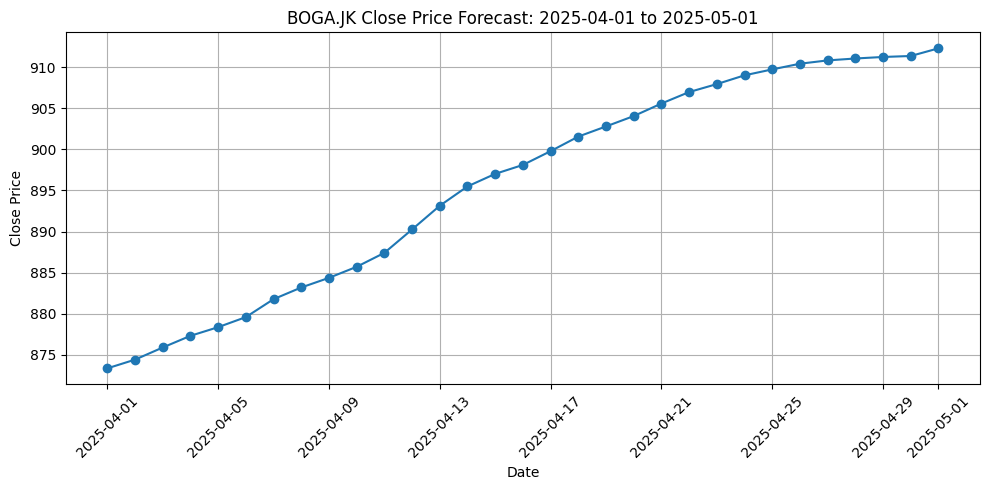

In [134]:
plot_forecasted_close(
    data=data,
    mapping_ticker=mapping_ticker,
    future_predict_model= updated_poly_pipeline2,
    close_predict_model= ensemble_regressor,
    target_date_str='2025-05-01',
    ticker_symbol='BOGA.JK'
)

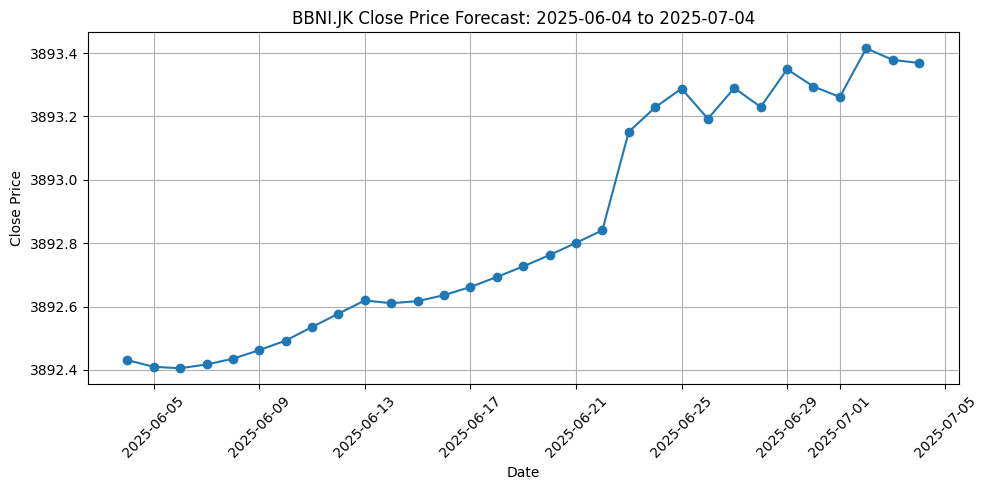

In [135]:
plot_forecasted_close(
    data=data,
    mapping_ticker= mapping_ticker,
    future_predict_model= updated_poly_pipeline2,
    close_predict_model= ensemble_regressor,
    target_date_str='2025-07-04',
    ticker_symbol='BBNI.JK'
)

In [136]:
data_test = yf.download(tickers = listed_stock, start = "2025-01-01", end="2025-04-01", interval='1d', group_by='ticker', auto_adjust=True)

[*********************100%***********************]  20 of 20 completed


In [137]:
data_test.head()

Ticker          ASII.JK                                                   \
Price              Open         High          Low        Close    Volume   
Date                                                                       
2025-01-02  4598.831365  4655.028897  4589.465110  4636.296387  17924000   
2025-01-03  4636.296387  4655.028897  4608.197621  4636.296387  12711800   
2025-01-06  4636.296296  4683.127572  4552.000000  4552.000000  18412500   
2025-01-07  4552.000220  4608.197754  4542.633965  4608.197754  20452200   
2025-01-08  4570.732735  4598.831501  4505.168945  4505.168945  23739400   

Ticker     NATO.JK                               ...      BBNI.JK  \
Price         Open   High    Low  Close  Volume  ...         Open   
Date                                             ...                
2025-01-02   159.0  159.0  140.0  148.0  249000  ...  4001.562687   
2025-01-03   145.0  145.0  138.0  139.0  117200  ...  4221.832023   
2025-01-06   139.0  146.0  139.0  145.0  132200  ...  4175.942612   
2025-01-07   139.0  150.0  139.0  150.0  228600  ...  4010.740396   
2025-01-08   150.0  154.0  149.0  150.0  135000  ...  3992.384687   

Ticker                                                            UNTR.JK  \
Price              High          Low        Close    Volume          Open   
Date                                                                        
2025-01-02  4212.654297  4001.562687  4212.654297  56985400  26598.275641   
2025-01-03  4249.365710  4166.764648  4166.764648  76388000  25723.332071   
2025-01-06  4185.120507  4047.452070  4065.807861  26008100  25573.342172   
2025-01-07  4047.451978  3983.206709  4001.562500  36973900  25523.345288   
2025-01-08  4065.807854  3992.384687  4010.740479  39476000  25898.320165   

Ticker                                                         
Price               High           Low         Close   Volume  
Date                                                           
2025-01-02  26598.275641  25498.346949  25698.333984  3884300  
2025-01-03  26023.312620  25373.354764  25573.341797  3428600  
2025-01-06  25723.332448  25123.371342  25398.353516  2878100  
2025-01-07  25923.319357  25373.355012  25848.324219  4428000  
2025-01-08  25923.318544  25173.367188  25173.367188  3282800  

[5 rows x 100 columns]

In [138]:
data_pred = forecast_to_date(
    data=data,
    mapping_ticker=mapping_ticker,
    future_predict_model=updated_poly_pipeline2,
    close_predict_model=ensemble_regressor,
    target_date_str='2025-04-01',
    ticker_symbol='BOGA.JK'
)

In [139]:
data_pred = data_pred[data_pred.index >= '2025-01-01'].copy()
data_pred

,Open,High,Low,Close,Volume
2025-01-01,563.922747,576.783249,549.327065,564.804503,1.129202e+08
2025-01-02,568.397202,581.350730,553.872848,568.899065,1.129754e+08
2025-01-03,572.458936,585.465497,558.079557,572.896050,1.129818e+08
2025-01-04,576.441232,589.517832,562.077686,576.556231,1.129524e+08
2025-01-05,580.087957,593.217140,565.728812,579.625032,1.129028e+08
...,...,...,...,...,...
2025-03-28,872.773942,888.989014,854.524684,870.203233,1.091742e+08
2025-03-29,873.598680,889.807607,855.340283,871.233099,1.091556e+08
2025-03-30,874.618792,890.883799,856.402085,871.983179,1.091573e+08
2025-03-31,875.360744,891.620298,857.143468,872.642523,1.091300e+08


### 5. Metrics and Evaluation

In [140]:
data_pred = data_pred[data_pred.index.isin(data_test.index)]

In [141]:
data_pred.drop(columns = ['Volume'], inplace = True)
y_test2 = data_test['BOGA.JK'].drop(columns = ['Volume'])

C:\Users\User\AppData\Local\Temp\ipykernel_23052\295867037.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data_pred.drop(columns = ['Volume'], inplace = True)


In [142]:
def root_mean_squared_error(y_true, y_pred):
    return np.sqrt(mean_squared_error(y_true, y_pred))

def evaluate_model(name, y_true, y_pred):
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = root_mean_squared_error(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)
    mape = np.mean(np.abs((y_true - y_pred) / y_true)) * 100
    da = np.mean((np.sign(np.diff(y_true)) == np.sign(np.diff(y_pred))).astype(int)) * 100

    return {
        "Model": name,
        "MAE": mae,
        "MSE": mse,
        "RMSE": rmse,
        "R2": r2,
        "MAPE": mape,
        "DA": da
    }

results = []
results.append(evaluate_model("Close Predict", y_test, y_pred_ensemble))
results.append(evaluate_model("Future Predict", y_test2, data_pred))
results_df = pd.DataFrame(results)

print(tabulate(results_df, headers='keys', tablefmt='fancy_grid', showindex=False))

╒════════════════╤══════════╤══════════╤═════════╤═══════════╤═══════════╤═════════╕
│ Model          │      MAE │      MSE │    RMSE │        R2 │      MAPE │      DA │
╞════════════════╪══════════╪══════════╪═════════╪═══════════╪═══════════╪═════════╡
│ Close Predict  │  39.7802 │ 232273   │ 481.947 │  0.989736 │  0.897273 │ 99.5178 │
├────────────────┼──────────┼──────────┼─────────┼───────────┼───────────┼─────────┤
│ Future Predict │ 118.631  │  17509.6 │ 132.324 │ -6.16742  │ 19.0236   │ 81.0345 │
╘════════════════╧══════════╧══════════╧═════════╧═══════════╧═══════════╧═════════╛


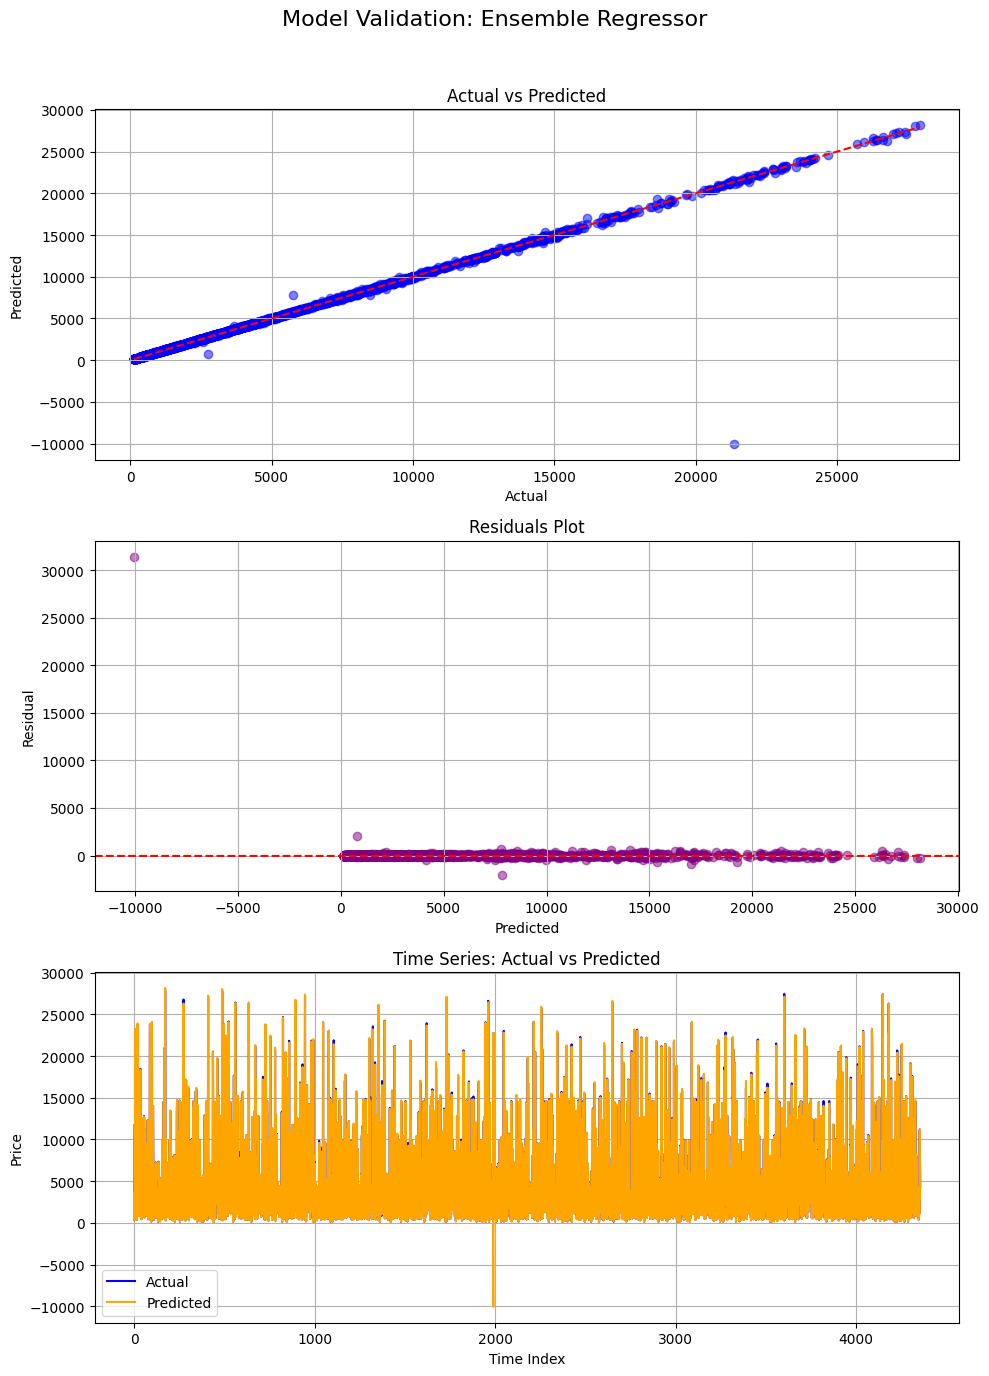

In [ ]:
def plot_model_validation(y_true, y_pred_ensemble):
    fig, axs = plt.subplots(3, 1, figsize=(10,14))
    fig.suptitle("Model Validation: Ensemble Regressor", fontsize=16)

    axs[0].scatter(y_true, y_pred_ensemble, alpha=0.5, color='blue')
    axs[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    axs[0].set_title("Actual vs Predicted")
    axs[0].set_xlabel("Actual")
    axs[0].set_ylabel("Predicted")
    axs[0].grid(True)

    residuals = y_true - y_pred_ensemble
    axs[1].scatter(y_pred_ensemble, residuals, alpha=0.5, color='purple')
    axs[1].axhline(y=0, color='red', linestyle='--')
    axs[1].set_title("Residuals Plot")
    axs[1].set_xlabel("Predicted")
    axs[1].set_ylabel("Residual")
    axs[1].grid(True)

    axs[2].plot(y_true.reset_index(drop=True), label="Actual", color='blue')
    axs[2].plot(y_pred_ensemble, label="Predicted", color='orange')
    axs[2].set_title("Time Series: Actual vs Predicted")
    axs[2].set_xlabel("Time Index")
    axs[2].set_ylabel("Price")
    axs[2].legend()
    axs[2].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_model_validation(y_test, y_pred_ensemble)

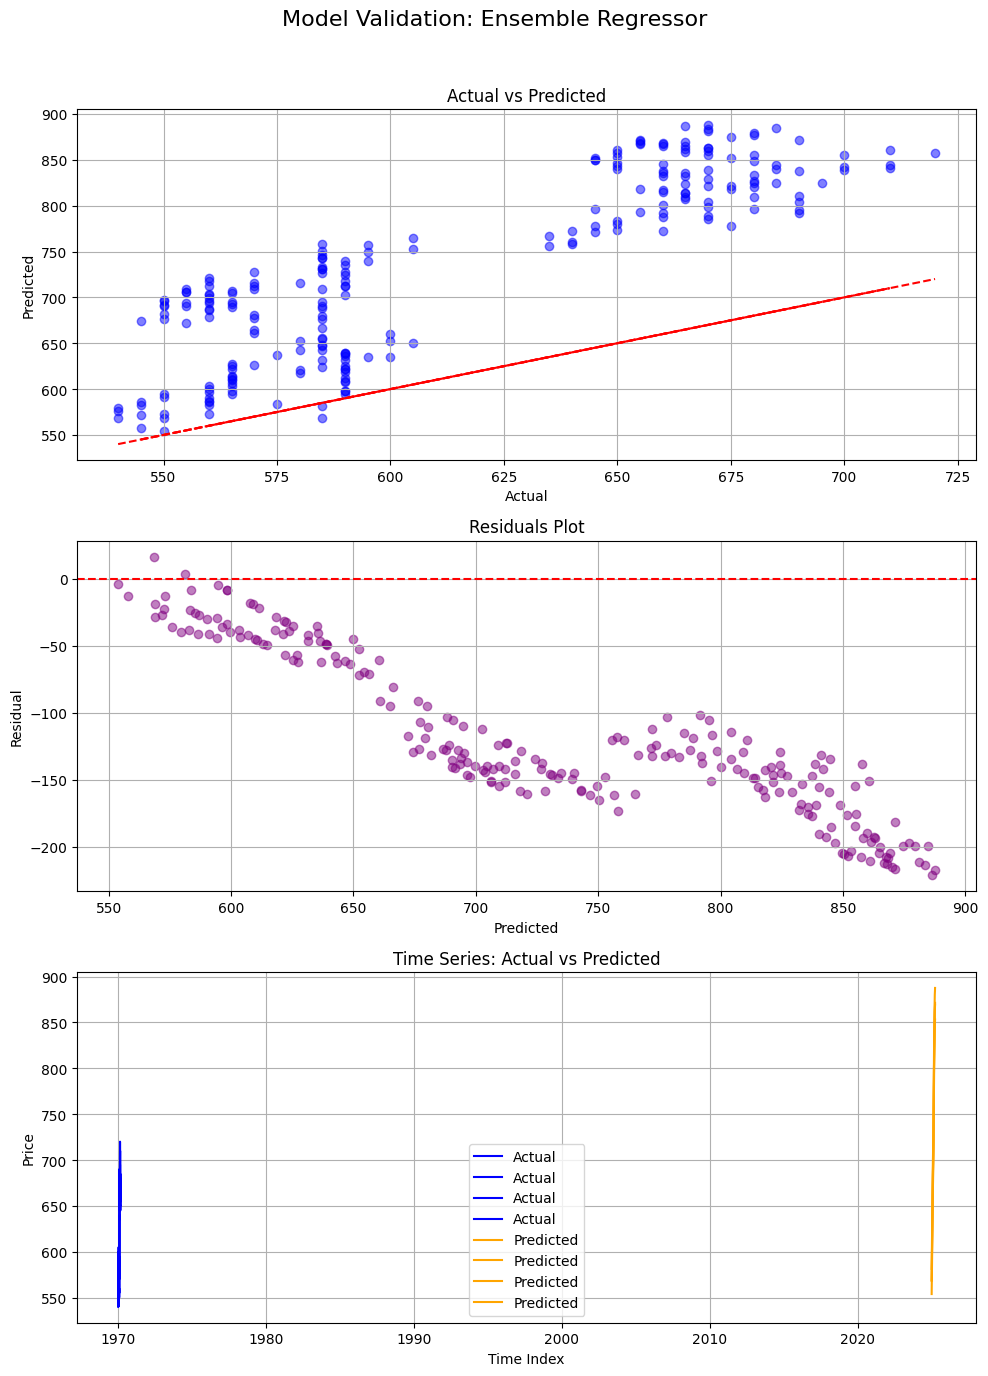

In [ ]:
def plot_model_validation(y_true, y_pred_ensemble):
    fig, axs = plt.subplots(3, 1, figsize=(10,14))
    fig.suptitle("Model Validation: Polynomial Regressor", fontsize=16)

    axs[0].scatter(y_true, y_pred_ensemble, alpha=0.5, color='blue')
    axs[0].plot([y_true.min(), y_true.max()], [y_true.min(), y_true.max()], 'r--')
    axs[0].set_title("Actual vs Predicted")
    axs[0].set_xlabel("Actual")
    axs[0].set_ylabel("Predicted")
    axs[0].grid(True)

    residuals = y_true - y_pred_ensemble
    axs[1].scatter(y_pred_ensemble, residuals, alpha=0.5, color='purple')
    axs[1].axhline(y=0, color='red', linestyle='--')
    axs[1].set_title("Residuals Plot")
    axs[1].set_xlabel("Predicted")
    axs[1].set_ylabel("Residual")
    axs[1].grid(True)

    axs[2].plot(y_true.reset_index(drop=True), label="Actual", color='blue')
    axs[2].plot(y_pred_ensemble, label="Predicted", color='orange')
    axs[2].set_title("Time Series: Actual vs Predicted")
    axs[2].set_xlabel("Time Index")
    axs[2].set_ylabel("Price")
    axs[2].legend()
    axs[2].grid(True)

    plt.tight_layout(rect=[0, 0, 1, 0.96])
    plt.show()

plot_model_validation(y_test_other, data_pred)